## Dataset Description

### Overview

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

There is also another file called `gender_submission.csv` which is not relevant to this work but only come from Kaggle Titanic case original package.

In this work for Coding project we will only try to do basis analysis on training set and show how to display data.

### Import libraries

In [1]:
import os
import pathlib

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In this example we will only consider the training dataset (`train.csv`) for display.

In [2]:
train_set_df = pd.read_csv('train.csv')

### Study on the dataset

In [3]:
"""
First look on the data
"""

print("""
###############################################
##    Train Set DataFrame                    ##        
###############################################
""")

print(f"Three example from the top of the training set dataset\n\n{train_set_df.head(3)}\n{'#'*20}")
print(f"Columns & datatype of the training set\n\n{train_set_df.info()}\n{'#'*20}")
print(f"Check total null value of each column\n\n{train_set_df.isnull().sum()}\n{'#'*20}")


###############################################
##    Train Set DataFrame                    ##        
###############################################

Three example from the top of the training set dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns)

#### Checking data of each column

Despite having multiple columns, there is only few columns that we interested in.

| Variable  | Definition                               | Key                                      | Relevant |
|-----------|------------------------------------------|------------------------------------------|----------|
| survival  | Survival                                 | 0 = No, 1 = Yes                          | ✅ |
| pclass    | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd                | ✅ |
| sex       | Sex (sex assigned at birth)              | male, female                             | ✅ |
| age       | Age in years                             |                                          | ✅ |
| sibsp     | # of siblings / spouses aboard the Titanic |                                        | |
| parch     | # of parents / children aboard the Titanic |                                        | |
| ticket    | Ticket number                            |                                          | |
| fare      | Passenger fare                           |                                          | |
| cabin     | Cabin number                             |                                          | ✅ (but will ignore due to high number of missing values) |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton | |

**Our conclusion for this case is that only 3 columns `Age`, `Sex`, `pclass` are relevant information to us**

### Cleaning Data

```
Check total null value of each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
```

We can see from previous result that in our dataset there is 3 columns that contain null values: `Age`, `Cabin`, `Embarked`.

Due to high number of missing values in `Cabin` column, we will ignore data in `Cabin` and also `Embarked` column since it is not relevant.

Hence we will only need to clean rows inwhich `Age` data is null.


In [4]:
"""
Drop null values from the training set where Age is null
"""
train_set_df.dropna(subset=['Age'], inplace=True)


### Ploting out data

We would like to study the relation ship between survival and:

1. `Age`
2. `Sex`
3. `Passenger Class`

Check the number of survived passengers by Age

Survived  Age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Length: 142, dtype: int64
####################
Check the number of survived passengers by AgeGroup

Survived  AgeGroup  
0         Child          29
          Teenager       56
          Adult         237
          Middle Age     83
          Senior         19
1         Child          39
          Teenager       40
          Adult         150
          Middle Age     54
          Senior          6
dtype: int64
####################


/var/folders/mv/2l0ks16x4rqdc6kxprt17l340000gn/T/ipykernel_32413/2330475100.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"Check the number of survived passengers by AgeGroup\n\n{train_set_df.groupby(['Survived', 'AgeGroup']).size()}\n{'#'*20}")


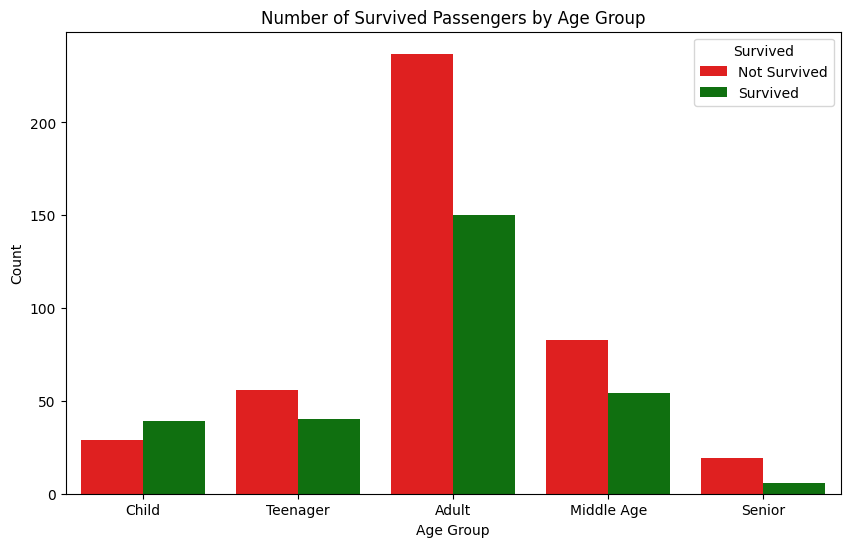

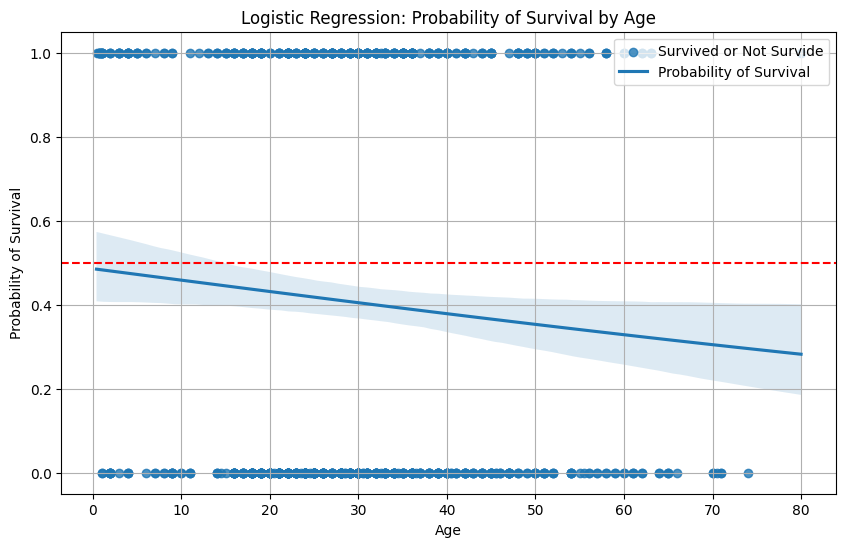

In [5]:
"""
Study relationship between Age and Survived
"""

print(f"Check the number of survived passengers by Age\n\n{train_set_df.groupby(['Survived', 'Age']).size()}\n{'#'*20}")

### Split age into bins
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
train_set_df['AgeGroup'] = pd.cut(train_set_df['Age'], bins=bins, labels=labels, right=False)


print(f"Check the number of survived passengers by AgeGroup\n\n{train_set_df.groupby(['Survived', 'AgeGroup']).size()}\n{'#'*20}")


#### Plot the number of survived passengers by AgeGroup
# Use color greens for survived and reds for not survived
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=train_set_df, palette={1: 'green', 0: 'red'}) # create grouped bar plot which split by survived and not survived
plt.title('Number of Survived Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

### Plot Logistic Regression Curve of Survived by Age with legends
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Survived', data=train_set_df, logistic=True)
plt.title("Logistic Regression: Probability of Survival by Age")
plt.ylabel("Probability of Survival")
plt.xlabel("Age")
# turn on the grid
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='50% Survival Rate') # add a horizontal line at 50% survival rate
plt.legend(['Survived or Not Survide', 'Probability of Survival'], loc='upper right')
plt.show()


##### **<p style="color:green"> ➡️ Here we conclude that the older a customer a lower chance of survival </p>**

Check the number of survived passengers by Sex

Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
dtype: int64
####################


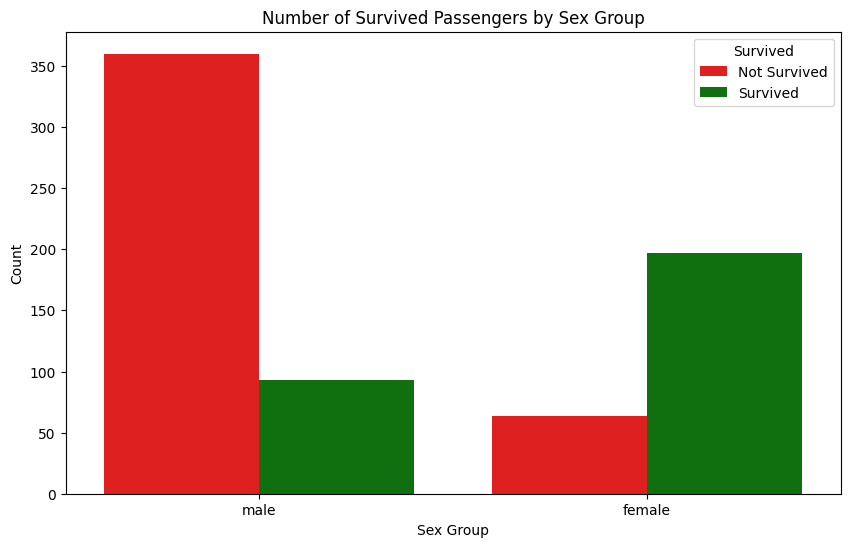

In [6]:
"""
Study relationship between Sex and Survived
"""

print(f"Check the number of survived passengers by Sex\n\n{train_set_df.groupby(['Survived', 'Sex']).size()}\n{'#'*20}")


#### Plot the number of survived passengers by Sex
# Use color greens for survived and reds for not survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train_set_df, palette={1: 'green', 0: 'red'}) # create grouped bar plot which split by survived and not survived
plt.title('Number of Survived Passengers by Sex Group')
plt.xlabel('Sex Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

##### **<p style="color:green"> ➡️ Here we conclude that `male` have lower chance of survival than `female`</p>**

Check the number of survived passengers by Pclass

Survived  Pclass
0         1          64
          2          90
          3         270
1         1         122
          2          83
          3          85
dtype: int64
####################


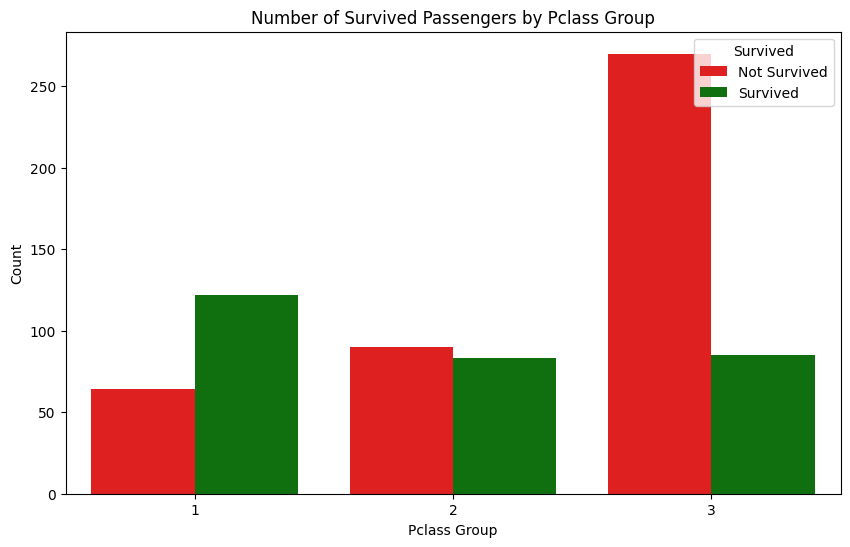

Check the average fare of each Pclass

Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64
####################


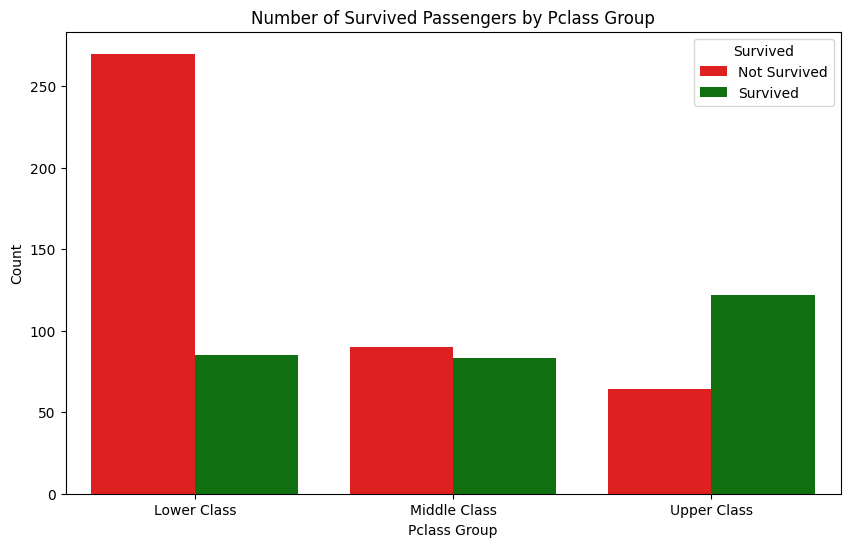

In [7]:
"""
Study relationship between Passenger Class and Survived
"""

print(f"Check the number of survived passengers by Pclass\n\n{train_set_df.groupby(['Survived', 'Pclass']).size()}\n{'#'*20}")
#### Plot the number of survived passengers by Pclass
# Use color greens for survived and reds for not survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_set_df, palette={1: 'green', 0: 'red'}) # create grouped bar plot which split by survived and not survived
plt.title('Number of Survived Passengers by Pclass Group')
plt.xlabel('Pclass Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

# To understand what is the Pclass, we can check the data dictionary and count average fare of each Pclass
print(f"Check the average fare of each Pclass\n\n{train_set_df.groupby(['Pclass']).Fare.mean()}\n{'#'*20}")

# Now reassign each Pclass to a new column called PclassGroup based on the average fare
train_set_df['PclassGroup'] = train_set_df['Pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})

# Plot the number of survived passengers by PclassGroup
# short the PclassGroup by the order of Upper Class, Middle Class, Lower Class
train_set_df['PclassGroup'] = pd.Categorical(train_set_df['PclassGroup'], categories=['Lower Class', 'Middle Class', 'Upper Class'], ordered=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='PclassGroup', hue='Survived', data=train_set_df, palette={1: 'green', 0: 'red'}) # create grouped bar plot which split by survived and not survived
plt.title('Number of Survived Passengers by Pclass Group')
plt.xlabel('Pclass Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

##### **<p style="color:green"> ➡️ Here we conclude passenger in higher class have higher chance of survival.</p>**

### General Conclusions

##### **<p style="color:green"> ➡️ 1. The older a passenger a lower chance of survival.</p>**
##### **<p style="color:green"> ➡️ 2. `male` passengers have lower chance of survival than `female` passengers.</p>**
##### **<p style="color:green"> ➡️ 3. Passengers who pay less for ticket have lower chance of survival than passengers who pay more.</p>**

### Modalize our findings

In [8]:
"""
Putting all together, we will create a model to predict the survival of passengers
based on the features we have studied above

From the above analysis, we can see that
1. Age is a continuous variable, we can use it as is
2. Sex is a categorical variable, we can use one-hot encoding to convert it to numerical
3. Pclass is a categorical variable, we can use one-hot encoding to convert it to numerical
"""


# TODO: Create a decision tree model to predict the survival of passengers based on the features we have studied above



'\nPutting all together, we will create a model to predict the survival of passengers\nbased on the features we have studied above\n\nFrom the above analysis, we can see that\n1. Age is a continuous variable, we can use it as is\n2. Sex is a categorical variable, we can use one-hot encoding to convert it to numerical\n3. Pclass is a categorical variable, we can use one-hot encoding to convert it to numerical\n'

In [ ]:
# We can convert this notebook to a markdown file and rename it to README.md
#!jupyter nbconvert --to markdown titanic.ipynb
#!mv titanic.md README.md

[NbConvertApp] Converting notebook titanic.ipynb to markdown
[NbConvertApp] Support files will be in titanic_files/
[NbConvertApp] Writing 13921 bytes to titanic.md
